In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Create the dataset
np.random.seed(123)
students = pd.DataFrame({
    'Student ID': range(1, 1001),
    'Gender': np.random.choice(['Male', 'Female'], size=1000),
    'Age': np.random.normal(20, 2, size=1000),
    'Course': np.random.choice(['Science', 'Arts', 'Commerce'], size=1000),
    'Attendance Percentage': np.random.normal(80, 10, size=1000),
    'Midterm Score': np.random.normal(70, 15, size=1000),
    'Final Exam Score': np.random.normal(75, 10, size=1000)
})

In [ ]:
# Assign overall grade based on final exam score
students['Overall Grade'] = pd.cut(students['Final Exam Score'], bins=[0, 60, 70, 80, 90, 100], 
                                   labels=['F', 'D', 'C', 'B', 'A'])

In [ ]:
# Check for missing values
students.isnull().sum()

# Check for inconsistencies in categorical variables
students['Gender'].value_counts()
students['Course'].value_counts()
students['Overall Grade'].value_counts()


C    357
B    280
D    235
A     71
F     53
Name: Overall Grade, dtype: int64

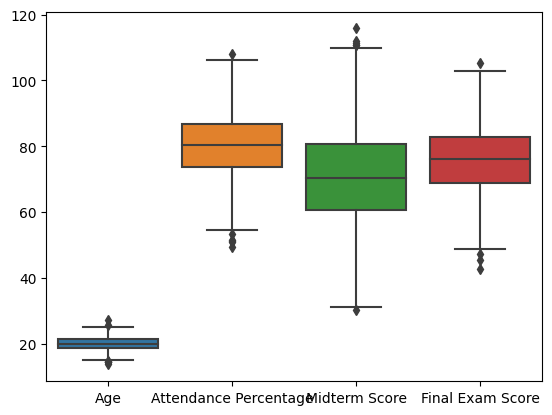

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for numeric variables
sns.boxplot(data=students[['Age', 'Attendance Percentage', 'Midterm Score', 'Final Exam Score']])
plt.show()


In [ ]:
from scipy.stats.mstats import winsorize

# Apply Winsorization to deal with outliers
students['Age'] = winsorize(students['Age'], limits=[0.05, 0.05])
students['Attendance Percentage'] = winsorize(students['Attendance Percentage'], limits=[0.05, 0])
